
V matrix =
0
0
0
0

R matrix =
 0.435	   0	   0	   0
   0	0.435	   0	   0
   0	   0	0.816	   0
   0	   0	   0	0.816

I matrix =
0
0
0
0

G matrix =
    0	   0	   0	   0
   0	   0	   0	   0
   0	26.13	   0	26.884
-26.13	   0	-26.884	   0

G matrix multiplied by 1/2pif =
  0.0	 0.0	 0.0	 0.0
 0.0	 0.0	 0.0	 0.0
 0.0	0.0831743732598245	 0.0	0.08557442980165028
-0.0831743732598245	 0.0	-0.08557442980165028	 0.0

L matrix =
 26.884	   0	26.13	   0
   0	26.884	   0	26.13
26.13	   0	26.884	   0
   0	26.13	   0	26.884

L matrix multiplied by 1/2pif =
 0.08557442980165028	 0.0	0.0831743732598245	 0.0
 0.0	0.08557442980165028	 0.0	0.0831743732598245
0.0831743732598245	 0.0	0.08557442980165028	 0.0
 0.0	0.0831743732598245	 0.0	0.08557442980165028

L matrix inverse =
 211.29140928368014	 0.0	-205.36544132504696	-0.0
 0.0	211.29140928368014	 0.0	-205.36544132504696
-205.36544132504696	 0.0	211.29140928368014	-0.0
 0.0	-205.36544132504696	 0.0	211.29140928368014


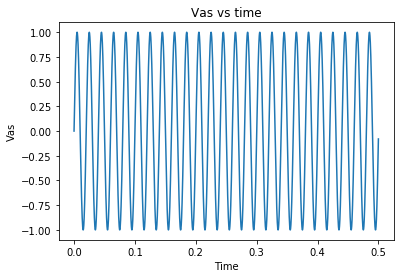

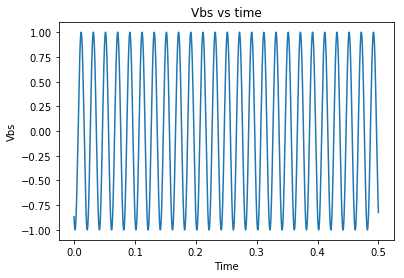

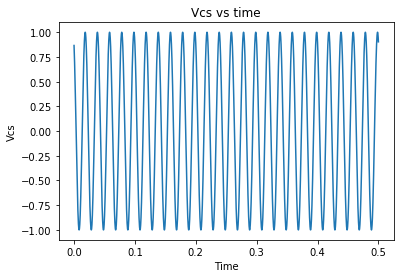

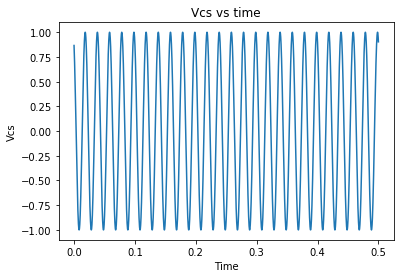

In [3]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import math
from scipy import integrate
from scipy.integrate import ode
from scipy.integrate import quad
from scipy.integrate import trapz
%matplotlib inline

Vm = 230
w = 314
tme = 0
freq = 50
mult_fac = (1/ (2 * np.pi * freq))
W_R = 0        #initial val
Lm=.0832
J = 0.089
T_L = 5
B= 0.016

my_tme_vals = []
my_Vas_vals = []
my_Vbs_vals = []
my_Vcs_vals = []
my_Vds_vals = []
my_Vqs_vals = []
my_torque_vals = []



V_mat =[[0],[0], [0], [0]]
print("\nV matrix =")
print('\n'.join(['\t'.join(['{:1}'.format(item) for item in row]) for row in V_mat]))

R_mat=[[.435 ,0, 0, 0],[0, .435, 0, 0],[0, 0, .816, 0],[0, 0, 0, .816]]
print("\nR matrix =\n",'\n'.join(['\t'.join(['{:4}'.format(item) for item in row]) for row in R_mat]))

#I_mat = [[1],[1],[1],[1]]
I_mat = [[0],[0],[0],[0]]
print("\nI matrix =")
print('\n'.join(['\t'.join(['{:1}'.format(item) for item in row]) for row in I_mat]))

G_mat =[[0, 0 ,0 ,0],[0 ,0, 0 ,0],[0, 26.13 ,0 ,.754+26.13],[-26.13, 0 ,-.754-26.13 ,0]]
print("\nG matrix =\n",'\n'.join(['\t'.join(['{:4}'.format(item) for item in row]) for row in G_mat]))

for row in range(len(G_mat)):
    for col in range(len(G_mat[0])):
        G_mat[row][col] = mult_fac * G_mat[row][col]

print("\nG matrix multiplied by 1/2pif =\n",'\n'.join(['\t'.join(['{:4}'.format(item) for item in row]) for row in G_mat]))
        

L_mat =[[.754+26.13 ,0, 26.13 ,0],[0 ,.754+26.13 ,0 ,26.13],[26.13 ,0, .754+26.13 ,0],[0 ,26.13, 0 ,.754+26.13]]
print("\nL matrix =\n",'\n'.join(['\t'.join(['{:4}'.format(item) for item in row]) for row in L_mat]))

for row in range(len(L_mat)):
    for col in range(len(L_mat[0])):
        L_mat[row][col] = mult_fac * L_mat[row][col]

print("\nL matrix multiplied by 1/2pif =\n",'\n'.join(['\t'.join(['{:4}'.format(item) for item in row]) for row in L_mat]))
        
inv_L_mat=linalg.inv(L_mat)
print("\nL matrix inverse =\n",'\n'.join(['\t'.join(['{:4}'.format(item) for item in row]) for row in inv_L_mat]))


def Calc_curr_var(t, x, U):
    Vds = U[0]
    Vqs = U[1]
    W_R = U[2]
    #Vas = Vm * math.sin(w * t)
    #Vbs = Vm * math.sin(w*t - ((2 * np.pi) / 3))
    #Vcs = Vm * math.sin(w*t + ((2 * np.pi) / 3))
    #Vds = (2/3) * (Vas - (Vbs / 2) - (Vcs / 2))
    #Vqs = (2/3) * ((np.sqrt(3) / 2) * (Vbs - Vcs))
    #my_tme_vals.append(t)
    #my_Vas_vals.append(Vas)
    #my_Vbs_vals.append(Vbs)
    #my_Vcs_vals.append(Vcs)
    #my_Vds_vals.append(Vds)
    #my_Vqs_vals.append(Vqs)
    V_mat[0] = [Vds]
    V_mat[1] = [Vqs]
    RxI_mat = np.dot(R_mat,I_mat)
    GxI_mat = np.dot(G_mat,I_mat)
    prod = np.dot(W_R, GxI_mat)
    #prod = omega *  GxI_mat
    temp = V_mat - RxI_mat +  prod
    di_dt = np.dot(inv_L_mat,temp)
    ids = di_dt[0]
    iqs = di_dt[1]
    idr = di_dt[2]
    iqr = di_dt[3]
    torque = 3*Lm * (iqs*idr - iqr*ids)
    my_torque_vals.append(torque)
    W_R_dot = (2/J) * (torque - T_L - (B * W_R)/ 2)
    return [ids, iqs, idr, iqr, W_R_dot]

x0, t0 = [[0, 0, 0, 0, 0], 0]
integ = ode(Calc_curr_var)
integ.set_initial_value(x0, t0)
integ.set_integrator("dopri5")

 
#U =[[Vds_v], [Vqs_v], [Omega]]
U =[[0], [0], [0]]
temp_var = 0
mat = []
t_end = 0.5
dt = 0.0001

Ids_st = []
Iqs_st = []
Idr_st = []
Iqr_st = []
omega_st = []

while integ.successful() and integ.t < t_end:
    t0 = integ.t
    Vas = Vm * math.sin(w * t0)
    Vbs = Vm * math.sin(w*t0 - ((2 * np.pi) / 3))
    Vcs = Vm * math.sin(w*t0 + ((2 * np.pi) / 3))
    U[0] = (2/3) * (Vas - (Vbs / 2) - (Vcs / 2))             #Vds
    U[1] = (2/3) * ((np.sqrt(3) / 2) * (Vbs - Vcs))        #vqs
    U[2] = temp_var
    my_tme_vals.append(t0)
    my_Vas_vals.append(Vas)
    my_Vbs_vals.append(Vbs)
    my_Vcs_vals.append(Vcs)
    integ.set_f_params(U)
    s = integ.integrate(integ.t + dt)
    Ids_st.append(s[0])
    Iqs_st.append(s[1])
    Idr_st.append(s[2])
    Iqr_st.append(s[3])
    omega_st.append(s[4])
    temp_var = s[4]

plt.plot(my_tme_vals, my_Vas_vals)
#plt.axis([0, 0.1, -2, 2])
plt.title("Vas vs time")
plt.xlabel("Time")
plt.ylabel("Vas")
plt.show()

plt.plot(my_tme_vals, my_Vbs_vals)
#plt.axis([0, 0.1, -2, 2])
plt.title("Vbs vs time")
plt.xlabel("Time")
plt.ylabel("Vbs")
plt.show()

plt.plot(my_tme_vals, my_Vcs_vals)
#plt.axis([0, 0.1, -2, 2])
plt.title("Vcs vs time")
plt.xlabel("Time")
plt.ylabel("Vcs")
plt.show()

plt.plot(my_tme_vals, my_Vcs_vals)
#plt.axis([0, 0.1, -2, 2])
plt.title("Vcs vs time")
plt.xlabel("Time")
plt.ylabel("Vcs")
plt.show()
